# `Hierarchical clustering`

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from scipy.cluster import hierarchy
import seaborn as sns
import numpy as np

In [2]:
X, y = make_blobs(n_samples=500, centers=2, n_features=2,random_state=0)

In [3]:
x1= [a[0] for a in X]
x2= [a[1] for a in X]

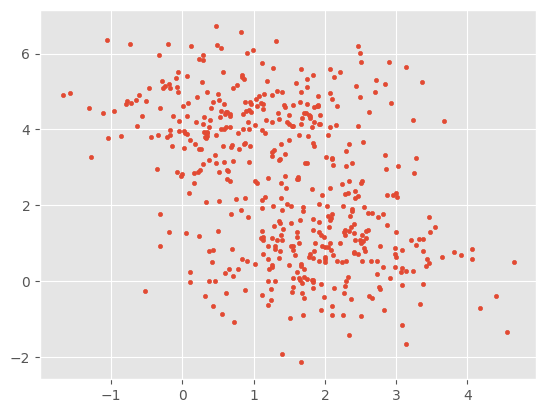

In [4]:
plt.scatter(x1,x2,marker='.')

#### How to choose the optimal cluster number?
#### Method 1: Dendogram

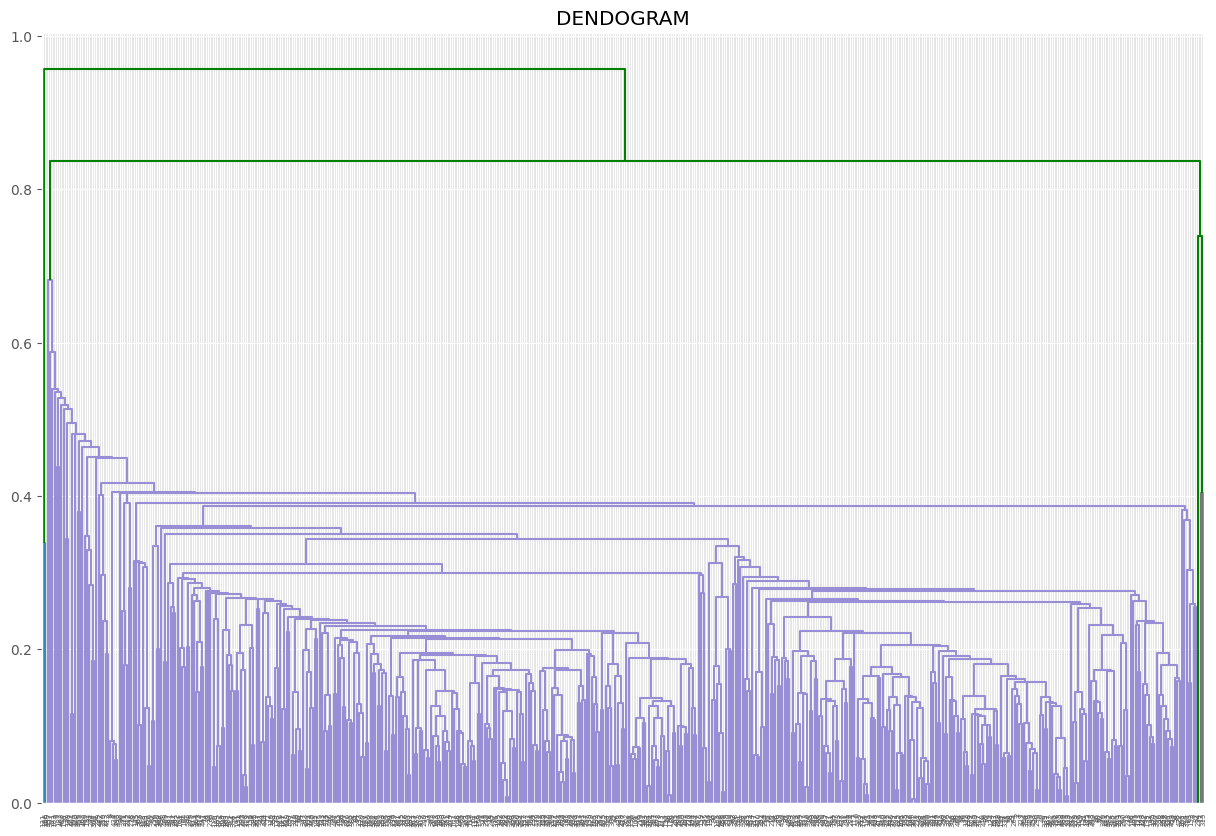

In [5]:
temp = hierarchy.linkage(X, 'single')
plt.figure(figsize=(15,10))
 
dn = hierarchy.dendrogram(
    temp, above_threshold_color="green", color_threshold=.7)
plt.title('DENDOGRAM')
plt.show()

#### Number of optimal clusters = number of vertical lines which intersect the horizontal line
#### Horizontal threshold line is determined either by domain expert such that the vertical lines are maximally separated or by iteratively visualizing the clusters for different threshold levels such that they provide best fit.

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
## using 2 as number of clusters to visualize the clustering 
cl = AgglomerativeClustering(n_clusters=2)
c_ = cl.fit_predict(X)

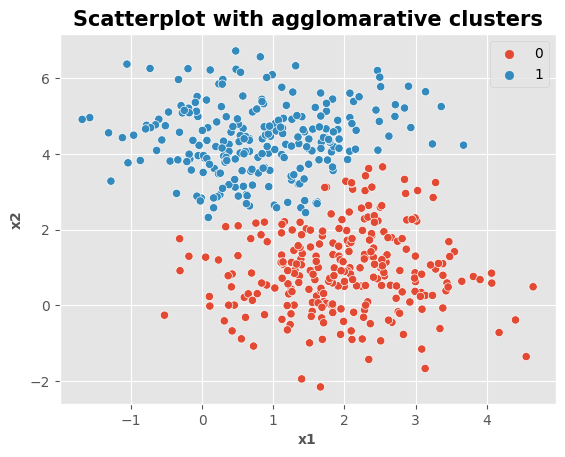

In [8]:
sns.scatterplot(x=x1,y=x2,hue=c_)
plt.title("Scatterplot with agglomarative clusters",weight='bold',size=15)
plt.xlabel('x1',weight='bold',size=10)
plt.ylabel('x2',weight='bold',size=10)
plt.show()

#### Method 2: Silhouette Score

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
sc = []
for i in range(2,10):
    cl = AgglomerativeClustering(n_clusters=i)
    c_ = cl.fit_predict(X)
    score = silhouette_score(X,c_)
    sc.append(score)
    

In [11]:
sc

[0.5295617249455579,
 0.34127673626281435,
 0.2788975677993625,
 0.2947746419686441,
 0.2909304475400635,
 0.3195373537901781,
 0.3076084083246642,
 0.2891948781061514]

Text(0, 0.5, 'Silhouette score')

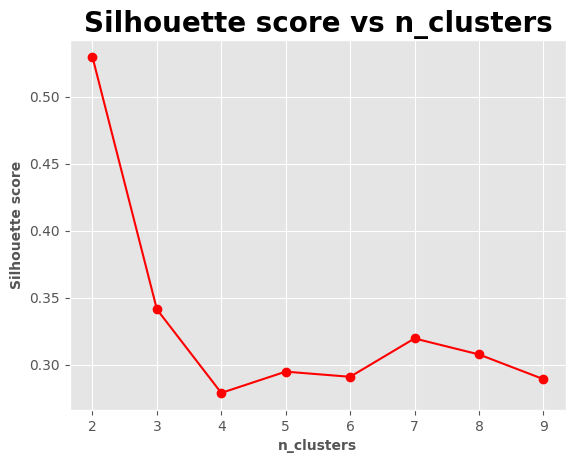

In [12]:
plt.plot(list(range(2,10)),sc,'ro-')
plt.title('Silhouette score vs n_clusters', weight='bold',size=20)
plt.xlabel('n_clusters',weight='bold',size=10)
plt.ylabel('Silhouette score',weight='bold',size=10)

#### <b>max silhouette socre is seen for n_clusters = 2 therefore 2 is the optimal cluster size for this hierarchical clustering model</b>